### MNIST Digit classification using keras and tensorflow

In [1]:
import numpy as np
import pandas.compat
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [2]:
import tensorflow as tf
from tensorflow import keras

The MNIST data is a database of handwritten digits from 0 to 9. The database contains 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.We Will create an ANN model for identifying the digit from the handwritten images.

In [3]:
from keras.datasets import mnist
mnist=keras.datasets.mnist
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


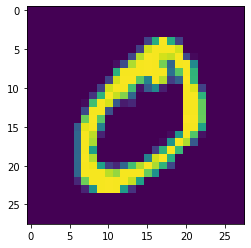

In [4]:
plt.imshow(X_train[1]) # 2nd Image

In [5]:
Y_train[1] # Labels for the data present 

0

In [7]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

## Data Normalisation
We normalise the data so that data dimensions are approximately of same scale ie bw 0 and 1

In [8]:
x_train_new=X_train/255.
x_test_new=X_test/255.

In [9]:
x_train_new[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Split the dataset into training/valiadation and testing data set 
* Training data set - used to train the model
* Valiadation data set - used for tuning hyperparameters and evaluate the models 
* Testing data set - for testing the model after intial verifications by valiadation set 

In [10]:
# 6000 images for validation and other for training data set 
x_valid,x_train=x_train_new[:6000],x_train_new[6000:]
y_valid,y_train=Y_train[:6000],Y_train[6000:]
x_test=x_test_new

In [11]:
len(x_train)

54000

* x_train,y_train - for training the model
* x_valid,y_valid - for tuning the hyperparameters 
* X_test,Y_test - for evaluating model performance

### Create Model architecture 
* Sequential -- Simple Neural Networks 
* Functional -- Complex Neural Networks

In [13]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(200,activation="relu"))# Hidden Layer Trainable Paramaters=28*28*200+200
model.add(keras.layers.Dense(100,activation="relu"))# Hidden Layer  Trainable Paramaters=200*100+100
model.add(keras.layers.Dense(10,activation="softmax"))# Multi-class Classification Trainable Paramaters=100*10+10

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


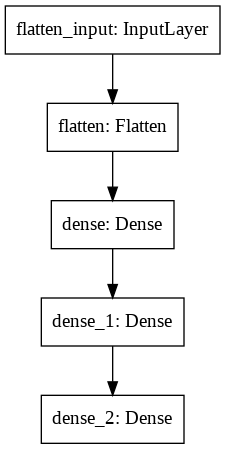

In [15]:
import pydot
keras.utils.plot_model(model) # Structure of the Model (Neural Network)

* We can access parameters using get_weights method

In [16]:
weights,biases=model.layers[1].get_weights()
weights

array([[-0.0251173 ,  0.07759373,  0.04315265, ..., -0.06539932,
         0.00312794, -0.07470035],
       [ 0.05843128,  0.06781387, -0.03330049, ...,  0.04564246,
         0.05310047, -0.01246399],
       [-0.01744538, -0.05500338,  0.03287037, ..., -0.05746949,
         0.03302298,  0.07741979],
       ...,
       [-0.03858506,  0.02514318, -0.00299364, ...,  0.07442065,
        -0.06210198, -0.05811974],
       [-0.01589511,  0.05551702,  0.07405381, ...,  0.04662888,
         0.06091657, -0.04812129],
       [ 0.05855507, -0.06415631, -0.02494321, ..., -0.03068598,
         0.01546881,  0.00429977]], dtype=float32)

In [17]:
weights.shape

(784, 200)

In [18]:
biases.shape

(200,)

### Compiling and training of Neural Network
https://keras.io/api/models/

In [19]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
# loss func for multi-class classification--- sparse_categorical_crossentropy ie when we have labels in y variable
# if we have probabilities in y variable--- categorical_crossentropy
# For binary labels we use binary crossentropy

In [20]:
model_history=model.fit(x_train,y_train,epochs=60,validation_data=(x_valid,y_valid))

Epoch 1/60
1688/1688 [==============================] - 7s 4ms/step - loss: 0.6537 - accuracy: 0.8322 - val_loss: 0.3246 - val_accuracy: 0.9082
Epoch 2/60
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2965 - accuracy: 0.9157 - val_loss: 0.2469 - val_accuracy: 0.9325
Epoch 3/60
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2421 - accuracy: 0.9310 - val_loss: 0.2151 - val_accuracy: 0.9398
Epoch 4/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2085 - accuracy: 0.9404 - val_loss: 0.1855 - val_accuracy: 0.9468
Epoch 5/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1831 - accuracy: 0.9482 - val_loss: 0.1659 - val_accuracy: 0.9550
Epoch 6/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1631 - accuracy: 0.9538 - val_loss: 0.1535 - val_accuracy: 0.9572
Epoch 7/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1466 - accuracy: 0.9585 - val_loss: 0.1512 - val_accuracy:

In [21]:
model_history.params

{'epochs': 60, 'steps': 1688, 'verbose': 1}

In [22]:
model_history.history

{'accuracy': [0.8321852087974548,
  0.9157407283782959,
  0.930981457233429,
  0.9404259324073792,
  0.9482222199440002,
  0.9538333415985107,
  0.9584629535675049,
  0.9624444246292114,
  0.965833306312561,
  0.9682777523994446,
  0.9706851840019226,
  0.973203718662262,
  0.9746296405792236,
  0.9767777919769287,
  0.9783889055252075,
  0.9798148274421692,
  0.9810370206832886,
  0.9819074273109436,
  0.9834444522857666,
  0.9842592477798462,
  0.9850184917449951,
  0.9861111044883728,
  0.9868147969245911,
  0.9877222180366516,
  0.9879074096679688,
  0.9887592792510986,
  0.9899073839187622,
  0.9904444217681885,
  0.9913148283958435,
  0.9917036890983582,
  0.992222249507904,
  0.9929259419441223,
  0.9933703541755676,
  0.9937407374382019,
  0.994185209274292,
  0.994685173034668,
  0.9949259161949158,
  0.9957592487335205,
  0.9959074258804321,
  0.9964814782142639,
  0.9968888759613037,
  0.996999979019165,
  0.9971851706504822,
  0.9972777962684631,
  0.9975740909576416,
  0.9

<function matplotlib.pyplot.show>

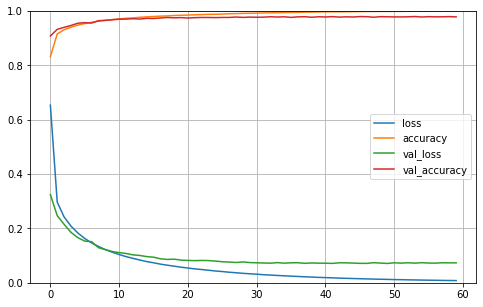

In [23]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

### Evaluating Performance and prediction of the Model


In [24]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 16.3072 - accuracy: 0.9754


[16.307212829589844, 0.9753999710083008]

In [25]:
x_new=X_test[:5]  # Taking first five datasets for evaluation and prediction


In [26]:
# Calculating the probability of each class(10 classes)
y_proba=model.predict(x_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
# Predicting which class does sample belongs to 
y_pred=np.argmax(y_proba,axis=1)
y_pred

array([7, 2, 1, 0, 4])

AxesImage(54,36;334.8x217.44)


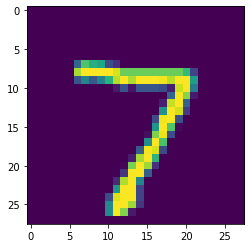

In [28]:
# Checking whether the prediction is right or not
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


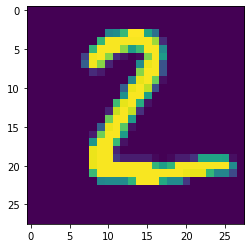

In [29]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


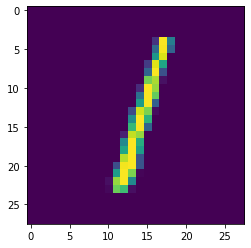

In [30]:
print(plt.imshow(X_test[2]))

AxesImage(54,36;334.8x217.44)


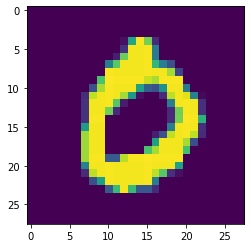

In [31]:
print(plt.imshow(X_test[3]))

AxesImage(54,36;334.8x217.44)


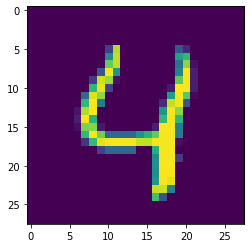

In [32]:
print(plt.imshow(X_test[4]))